<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>Автор: [Дмитрий Дрёмов](https://www.kaggle.com/dremovd)
    
## Простой разведочный анализ данных соревнования по категоризации покупок

[Kaggle Inclass](https://www.kaggle.com/c/receipt-categorisation) и отдельная [ссылка](https://www.kaggle.com/t/73f1a2eb0be9443ba1f8d2f283adc444) для участия. Недавно на чеках появились QR коды. Пока еще не все с этим знакомы, но по информации из этого кода можно получить полное содержание чека. Это дает возможность вести расходы, учитывая каждый отдельный товар, включая расходы, сделанные наличными. Как следствие наличия полной информации, можно анализировать изменения характера расходов и инфляцию по собственной продуктовой корзине. Названия товаров не стандартизованы: у одного товара в разных магазинах существенно отличаются названия; отдельные слова могут сокращаться; названия могут содержать опечатки. В магазины постоянно добавляются новые товары. Это делает простое составление каталога всех товаров с категориями нереалистичным.

Данные публикуются впервые, а обученные на них модели используются в [production](https://play.google.com/store/apps/details?id=com.dremovd.fnschecks&hl=ru). Задача, которую предлагается решить — это разбиение всех покупок чека по небольшому набору понятных человеку категорий.

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
PATH_TO_DATA = 'data'

In [3]:
train = pd.read_csv(os.path.join(PATH_TO_DATA, 'train.csv.gz'), encoding='utf-8')
train.fillna('', inplace=True)
train.head()

,check_id,name,category,price,count
0,0,*3479755 ТRUF.Конф.кр.корп.гл.вк.шок180г,Чай и сладкое,49.0,2.0
1,0,3408392 ECONTA Мешки д/мусора 30л 30шт,Для дома,21.0,1.0
2,0,3260497 ЯШКИНО Рулет С ВАР.СГУЩ. 200г,Чай и сладкое,39.0,1.0
3,0,3300573 Пакет ПЯТЕРОЧКА 65х40см,Упаковка,4.0,1.0
4,0,3413607 ЗЕР/СЕЛ.Сухари с изюмом 250г,Чай и сладкое,35.0,1.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcdefaults()
plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['font.fantasy'] = 'Arial'

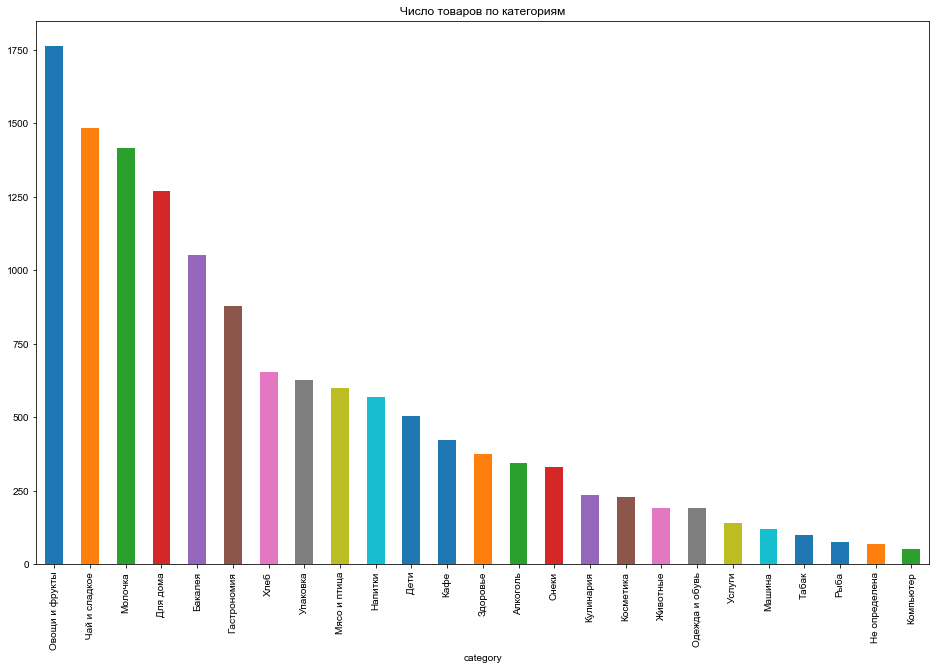

In [5]:
categories = train.groupby('category').count()['check_id']
categories = categories.sort_values(ascending = False)
plt.figure(figsize = (16, 10))
plt.title(u'Число товаров по категориям')
categories.plot(kind='bar');

In [6]:
checks = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_checks.csv.gz'))
checks.head()

,check_id,shop_name,datetime,sum
0,0,Не известно,2017-12-30 19:15:00,520.10
1,1,ЕВРОПА,2018-01-03 18:01:29,188.00
2,2,ПродвижениеФарм,2017-12-23 11:37:00,377.00
3,3,Не известно,2017-12-23 14:01:00,1024.00
4,4,ИП Роздухов М. Е.,2018-01-03 12:24:00,1542.16


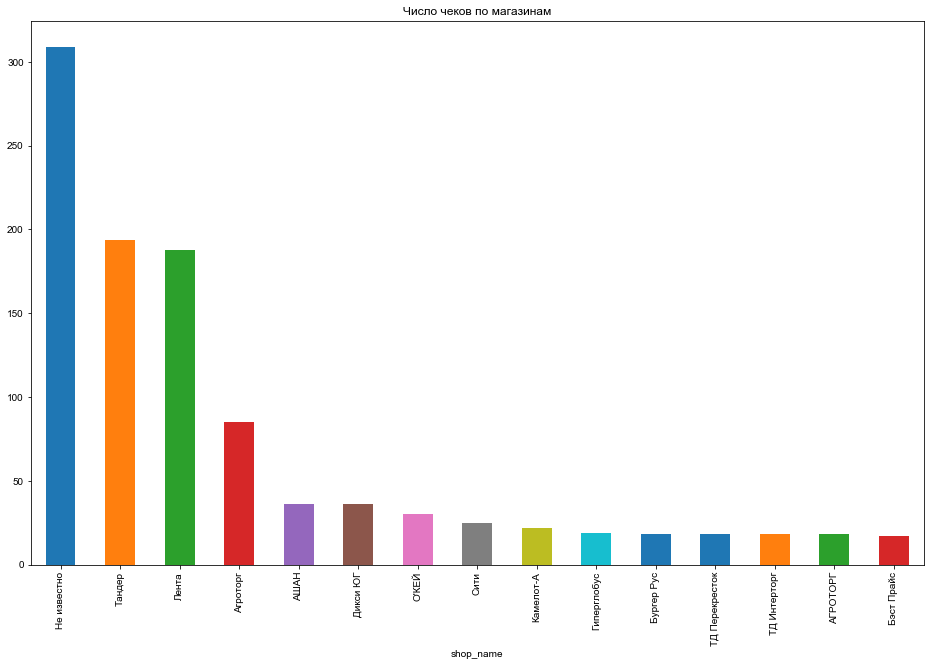

In [7]:
shops = checks.groupby('shop_name').count()['check_id']
shops = shops.sort_values(ascending = False)[:15]
plt.figure(figsize = (16, 10))
plt.title(u'Число чеков по магазинам')
shops.plot(kind='bar');

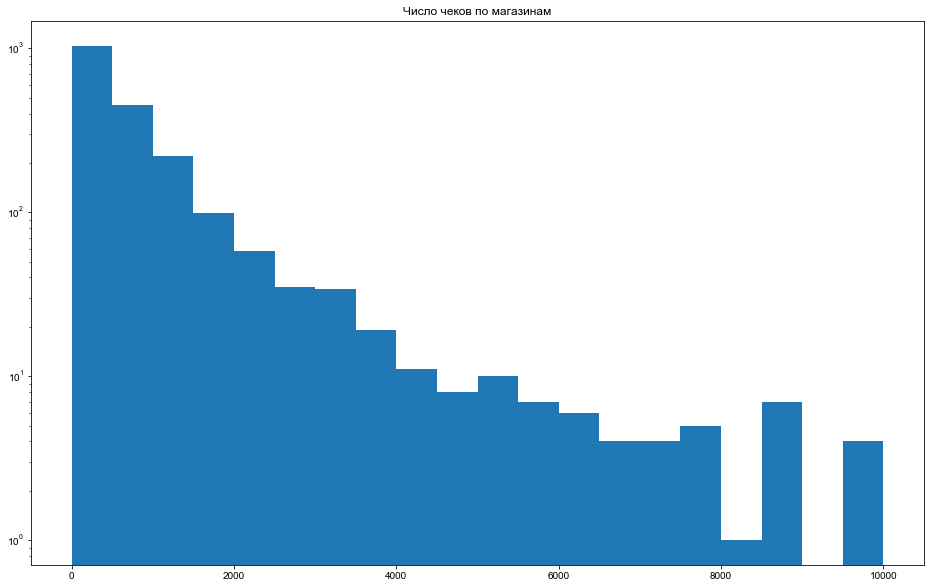

In [8]:
plt.figure(figsize = (16, 10))
plt.title(u'Число чеков по магазинам')
_ = plt.hist(checks['sum'], bins = 20, range = [0, 10000], log=True);